In [59]:
from missions.W2.M5.scraping import scrape_pages
import multiprocessing
import collections
import pandas as pd
import os
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import spacy

# spaCy 모델 로드
nlp = spacy.load('en_core_web_md')
collections.Callable = collections.abc.Callable

REVIEW_COUNT = 1200
PROCESS_NUM = 20
REVIEW_PER_PAGE = 20


def extract(company_name):
    with multiprocessing.Pool(PROCESS_NUM) as pool:
        pool.starmap(scrape_pages,
                     [(REVIEW_COUNT // REVIEW_PER_PAGE, PROCESS_NUM, i, company_name) for i in range(PROCESS_NUM)])
    df = concat_pages(company_name)
    return df


def concat_pages(company_name):
    dfs = []
    for file in os.listdir(os.path.join(f"./reviews/{company_name}")):
        df = pd.read_csv(f"./reviews/{company_name}/{file}").iloc[1:, 1:]
        df['title'] = df['title'].str.lower()
        df['description'] = df['description'].str.lower()
        dfs.append(df)
    return pd.concat(dfs, ignore_index=True)

In [60]:
def transform(company_name):
    df = pd.read_csv(os.path.join(f"./reviews/{company_name}.csv"), index_col=0)
    for i in range(0, 6):
        text = ' '.join(df[df['rating'] == float(i)]['description'].tolist())
        if len(text) == 0:
            continue
        # Process the text using spaCy
        doc = nlp(text)
        # Filter out stopwords and punctuation
        filtered_text = " ".join(token.lemma_.lower() for token in doc if not token.is_stop and token.is_alpha)
        adjectives = ' '.join(extract_adjectives(filtered_text))
        plt.figure(figsize=(10, 10))
        wordcloud = WordCloud(max_words=200, stopwords=STOPWORDS).generate(adjectives)
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.title(f'Rating: {i}')
        plt.axis("off")


def extract_adjectives(text):
    doc = nlp(text)
    adjectives = [token.text for token in doc if token.pos_ == 'ADJ']
    return adjectives

In [61]:
def load(df):
    df.to_csv(f"./reviews/{company_name}.csv", index=False)

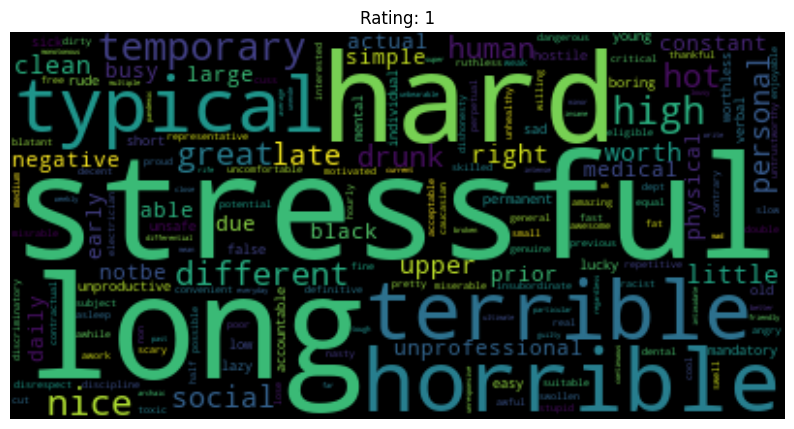

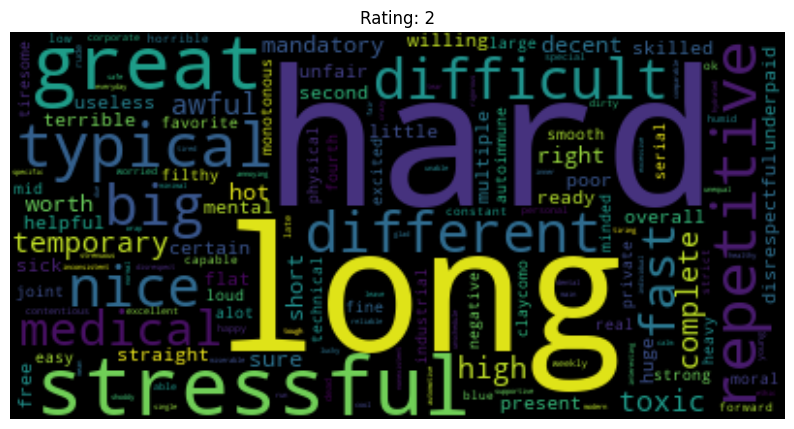

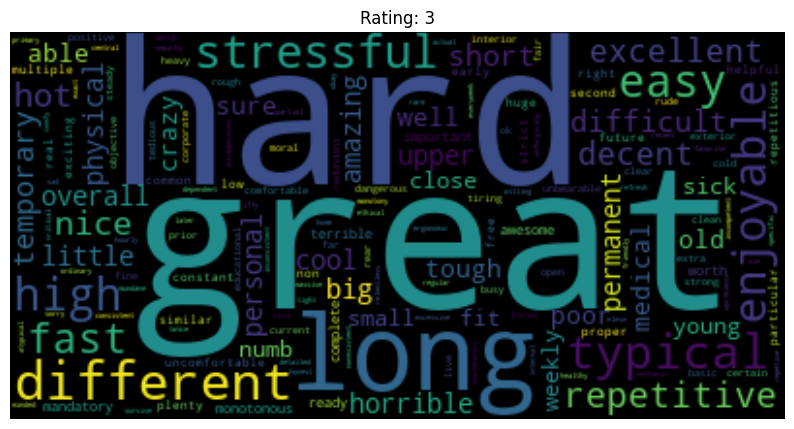

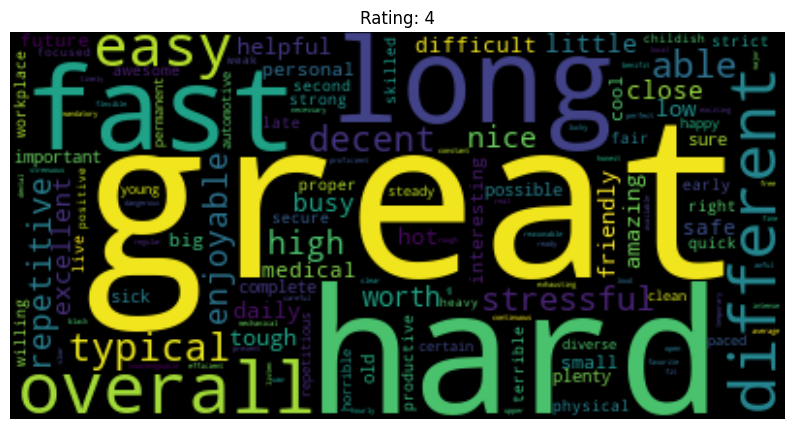

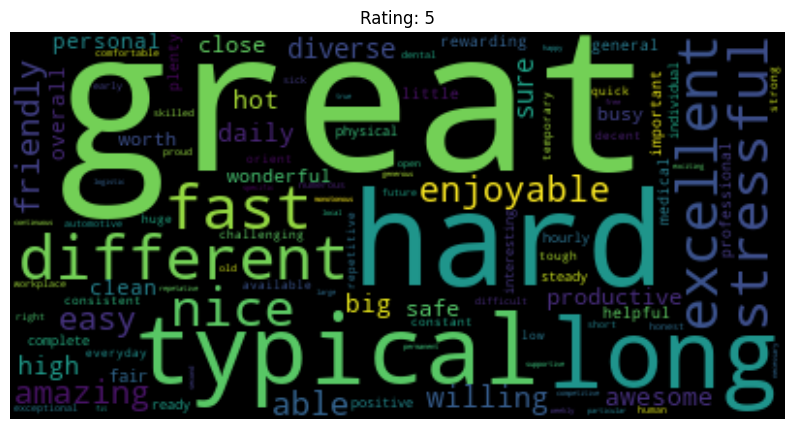

In [62]:
if __name__ == "__main__":
    company_name = "Ford-Motor-Company"
    df = extract(company_name)
    load(df)
    transform(company_name)
